In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.shape # call data frame size 

(3501, 2)

Text(0.5, 1.0, 'Height-Weight Data')

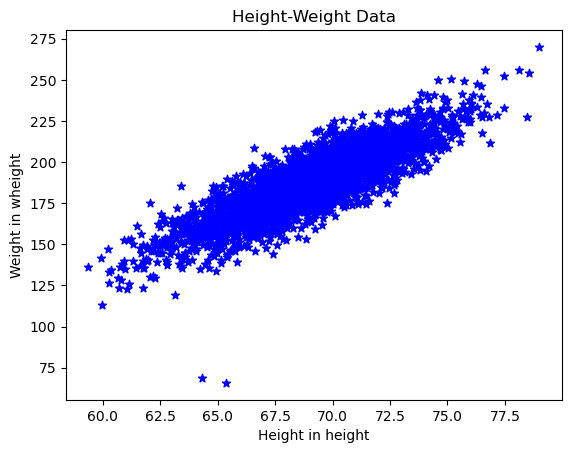

In [6]:
plt.scatter(df.Height , df.Weight, color='blue', marker='*')
plt.xlabel('Height in height') 
plt.ylabel('Weight in wheight')
plt.title('Height-Weight Data')

In [7]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [8]:
x.head()# seperate height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [9]:
y.head()# seperate weight

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [10]:
y.shape # data size

(3501, 1)

In [11]:
x.shape # data size

(3501, 1)

In [12]:
x.mean()# calculate the dataframe of height

Height    69.024411
dtype: float64

In [13]:
y.mean()# calculate the dataframe of weight

Weight    186.891258
dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(df, test_size=.25) # testiong data 25%

In [16]:
train.shape

(2625, 2)

In [17]:
test.shape

(876, 2)

In [18]:
train.head()

,Height,Weight
1921,67.704878,170.136428
2034,69.446391,198.827817
2748,71.617824,201.679352
1230,70.026049,193.089737
2737,66.299193,180.201266


# Seperate

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) # height and weight devided and seperate. this is the best option 

In [20]:
xtrain.head()

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [21]:
ytrain.head()

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


# Linear regression

In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
lr = LinearRegression()

In [24]:
lr

LinearRegression()

In [25]:
lr.fit(xtrain, ytrain) 

LinearRegression()

In [26]:
m = lr.coef_

In [34]:
m

array([[5.96613032]])

In [35]:
c = lr.intercept_
c

array([-224.98706384])

In [36]:
yp = (m*63)+c
yp

array([[150.87914646]])

In [37]:
lr.predict([[68]]) #predictin of height = 68 predict

array([[180.70979807]])

In [38]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [39]:
df['predicted_Weight'] = lr.predict(x)
df.head() 

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


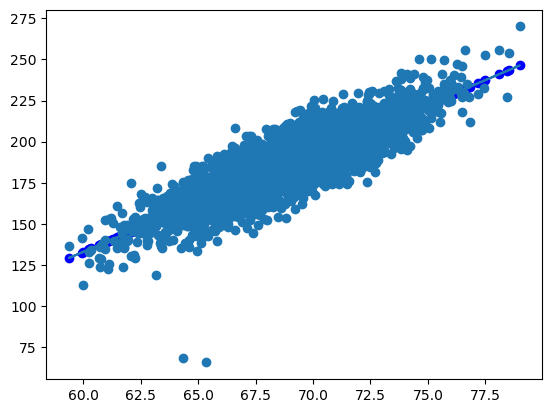

In [47]:
plt.plot(x, df[['predicted_Weight']])  
plt.scatter(x, df[['predicted_Weight']], color='blue')
plt.scatter(x, df[['Weight']])

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [50]:
mse

103.70875574105973

In [51]:
mae

8.145588569833935

In [52]:
lr.score(xtest, ytest)

0.7400625947962998

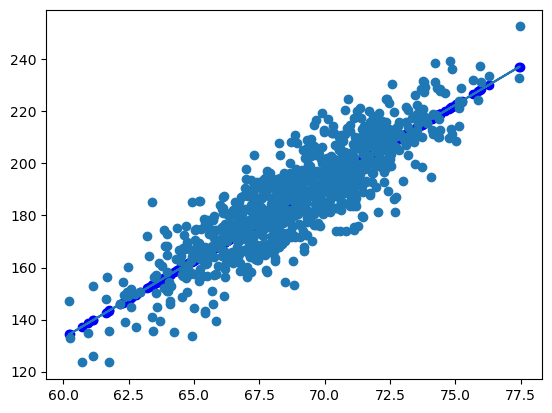

In [54]:
plt.plot(xtest, lr.predict(xtest))   
plt.scatter(xtest, lr.predict(xtest),color="blue")
plt.scatter(xtest, ytest)